Preliminary analysis of outdoor recreation network: degree distribution, centrality, connectance, etc...

({2048, 1, 2443, 2055, 2444, 2445, 2446, 20, 2070, 31, 2450, 2451, 46, 47, 2452, 2099, 2100, 2453, 57, 58, 2454, 62, 64, 2455, 2115, 2456, 2457, 77, 79, 2127, 81, 2458, 2132, 2133, 2459, 2137, 2460, 2141, 94, 2143, 96, 2461, 99, 2462, 101, 2463, 2154, 107, 108, 2464, 114, 2465, 116, 117, 2165, 2167, 2466, 121, 2172, 125, 2173, 2174, 2175, 2467, 2468, 2469, 148, 149, 2472, 153, 154, 156, 157, 163, 165, 166, 2218, 173, 2229, 2232, 187, 188, 2238, 2481, 198, 199, 200, 212, 213, 220, 221, 222, 223, 2273, 2274, 231, 236, 237, 2289, 2291, 2293, 246, 247, 2491, 258, 259, 260, 2307, 2308, 2309, 2311, 2312, 2313, 2314, 2315, 2317, 270, 2318, 2319, 273, 274, 275, 276, 2320, 2321, 2322, 2324, 2326, 2329, 2498, 289, 290, 2343, 2344, 2345, 2501, 299, 2347, 301, 302, 2349, 2350, 2352, 2353, 307, 308, 2354, 2357, 311, 312, 2358, 314, 2360, 2361, 2362, 2363, 2504, 2368, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 2376, 2377, 339, 2379, 2380, 2381, 2382, 344, 345, 34

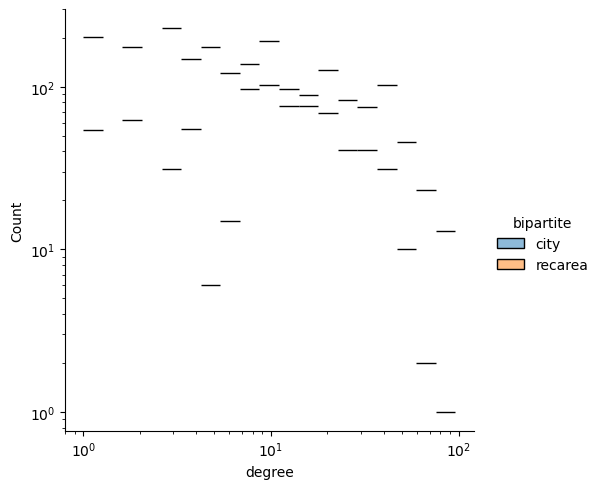

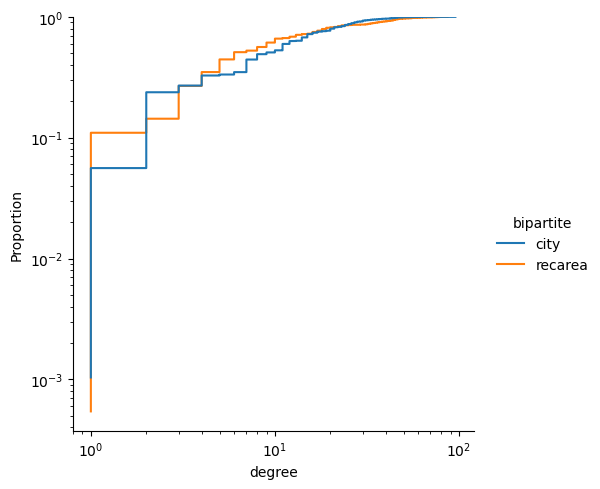

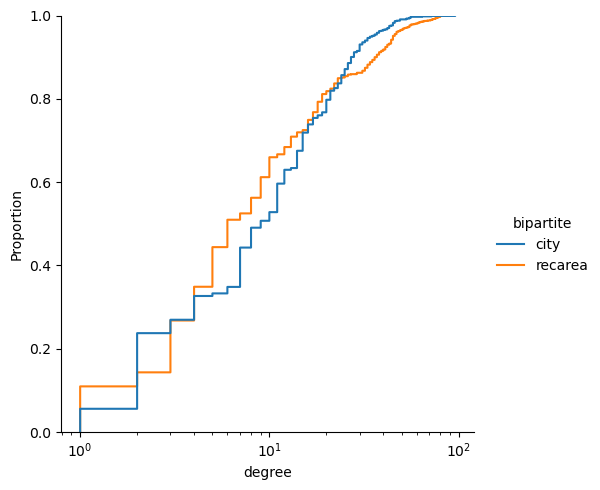

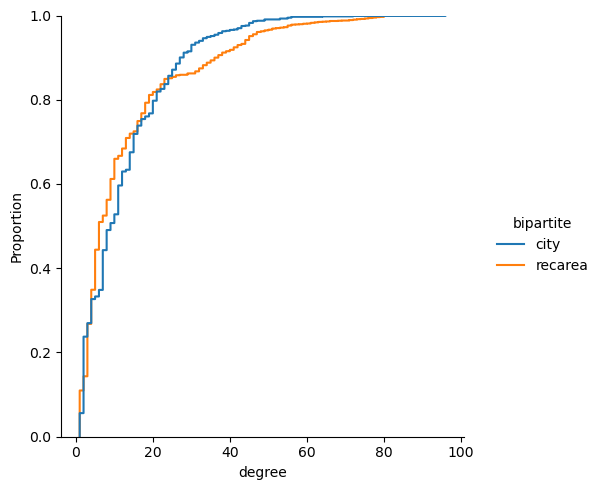

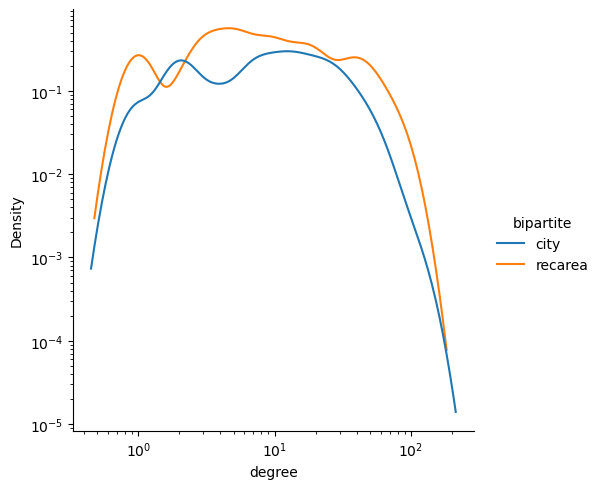

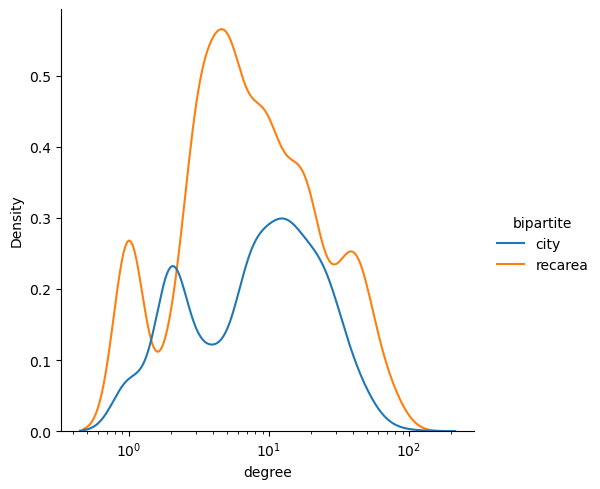

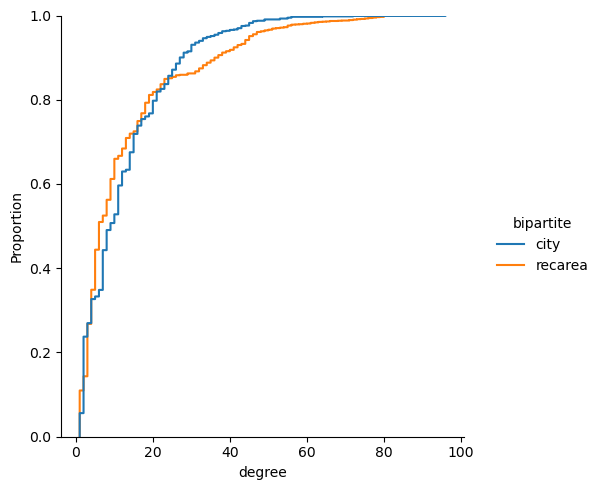

In [65]:
import json
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

G = nx.DiGraph()

f = open('./networks/outdoor_recreation_network_USA.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)

elements = data.get("elements")

nodes = elements.get("nodes")
edges = elements.get("edges")

nodes = [{'id': n.get('data').get('id'), 'latitude': n.get('data').get('latitude') , 'longitude': n.get('data').get('longitude'), 'bipartite' : n.get('data').get('bipartite')} for n in nodes]

edges = [ {'source':e.get('data').get('source'), 'target':e.get('data').get('target'),'time(s)':e.get('data').get('time'),'distance(km)':e.get('data').get('distance')} for e in edges ]

for node in nodes:
    id = int(node.get("id"))
    lat = float(node.get("latitude"))
    lon = float(node.get("longitude"))
    bip = node.get("bipartite")
    G.add_node(id, latitude=lat, longitude=lon, bipartite=bip)
        

for edge in edges:
    source = int(edge.get("source"))
    target = int(edge.get("target"))
    time = float(edge.get("time(s)"))
    distance = float(edge.get("distance(km)"))
    G.add_edge(source,target, time = time, distance = distance)


from networkx.algorithms import bipartite

print(bipartite.sets(G,top_nodes=[id for id,attr in G.nodes(data=True) if attr['bipartite']=='city']))

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
print(degree_sequence)
print(G.nodes(data=True))
print(G.edges(data=True))

import pandas as pd

nodes_data =  [ {**attr, 'id':id} for id,attr in G.nodes(data=True) ]

nodesDf = pd.DataFrame(nodes_data)
nodesDf["degree"] = degree_sequence #[d/dmax for d in degree_sequence]
print(nodesDf)

sns.displot(nodesDf, x = 'degree', hue = 'bipartite', kind='hist', log_scale=(True,True))
sns.displot(nodesDf, x = 'degree', hue = 'bipartite', kind='ecdf', log_scale=(True,True))
sns.displot(nodesDf, x = 'degree', hue = 'bipartite', kind='ecdf', log_scale=True)
sns.displot(nodesDf, x = 'degree', hue = 'bipartite', kind='ecdf', log_scale=False)
sns.displot(nodesDf, x = 'degree', hue = 'bipartite', kind='kde', log_scale=(True,True))
sns.displot(nodesDf, x = 'degree', hue = 'bipartite', kind='kde', log_scale=True)
sns.displot(nodesDf, x = 'degree', hue = 'bipartite', kind='ecdf', log_scale=False)

# print(nx.betweenness_centrality(G, k=100, endpoints=True))

Redundancy, clustering and centrality metrics: none are super informative

In [38]:
centrality = bipartite.closeness_centrality(G,nodes=[id for id,attr in G.nodes(data=True) if (attr['bipartite']=='city')])

# clustering_city = bipartite.latapy_clustering(G,nodes=[id for id,attr in G.nodes(data=True) if (attr['bipartite']=='city')])

# clustering_rec = bipartite.latapy_clustering(G,nodes=[id for id,attr in G.nodes(data=True) if (attr['bipartite']=='recarea')])

print(centrality)

{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 0.0, 89: 0.0, 90: 0.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.0, 99: 0.0, 100: 0.0, 101: 0.0, 102: 0.0, 103: 0.0, 104: 0.0, 105: 0.0, 106: 0.0, 107: 0.0, 108: 0.0, 109: 0.0, 110: 0.0, 111: 0.

Community structure

In [86]:
from infomap import Infomap

# nodes_sorted_by_type = list(nodesDf.sort_values(by = 'bipartite').id)

G1 = G.copy()

nodes_and_type = { id: attr.get('bipartite') for id,attr in G1.nodes(data=True) }
nodes_sorted_by_type = sorted(nodes_and_type.items(), key=lambda x:x[1])
nodes_sorted_by_type = [id for id,ntype in nodes_sorted_by_type]
relabeling =  dict(zip(nodes_sorted_by_type,G1.nodes))
G1 = nx.relabel_nodes(G1,relabeling)
print(G1.nodes(data=True))
bipartite_index = min([ id for id,attr in G1.nodes(data=True) if attr.get('bipartite') == 'recarea'])
print(bipartite_index)

im = Infomap(silent= False, directed=True,two_level=False)
im.bipartite_start_id = bipartite_index
mapping = im.add_networkx_graph(G1)  
im.run() 


communities = { mapping.get(node_id) : int(module) for node_id,module in im.get_modules().items()}
print(communities)
nx.set_node_attributes(G1, name='community', values=communities)

print(G1.nodes(data=True))

[(1, {'latitude': 39.0229714, 'longitude': -94.7145415, 'bipartite': 'city'}), (965, {'latitude': 38.312105, 'longitude': -95.962768, 'bipartite': 'recarea'}), (966, {'latitude': 38.92333, 'longitude': -95.33, 'bipartite': 'recarea'}), (967, {'latitude': 38.654905, 'longitude': -94.900047, 'bipartite': 'recarea'}), (968, {'latitude': 38.514529, 'longitude': -95.704914, 'bipartite': 'recarea'}), (969, {'latitude': 39.08333, 'longitude': -96.895, 'bipartite': 'recarea'}), (970, {'latitude': 39.118462, 'longitude': -95.411396, 'bipartite': 'recarea'}), (971, {'latitude': 38.65167, 'longitude': -95.55667, 'bipartite': 'recarea'}), (972, {'latitude': 39.255872, 'longitude': -96.589657, 'bipartite': 'recarea'}), (973, {'latitude': 38.256722, 'longitude': -94.656428, 'bipartite': 'recarea'}), (974, {'latitude': 38.679139, 'longitude': -96.505389, 'bipartite': 'recarea'}), (975, {'latitude': 38.242782, 'longitude': -95.753884, 'bipartite': 'recarea'}), (976, {'latitude': 37.73894, 'longitude':

[(1, {'latitude': 39.0229714, 'longitude': -94.7145415, 'bipartite': 'city', 'community': 1}), (965, {'latitude': 38.312105, 'longitude': -95.962768, 'bipartite': 'recarea', 'community': 1}), (966, {'latitude': 38.92333, 'longitude': -95.33, 'bipartite': 'recarea', 'community': 1}), (967, {'latitude': 38.654905, 'longitude': -94.900047, 'bipartite': 'recarea', 'community': 1}), (968, {'latitude': 38.514529, 'longitude': -95.704914, 'bipartite': 'recarea', 'community': 1}), (969, {'latitude': 39.08333, 'longitude': -96.895, 'bipartite': 'recarea', 'community': 1}), (970, {'latitude': 39.118462, 'longitude': -95.411396, 'bipartite': 'recarea', 'community': 1}), (971, {'latitude': 38.65167, 'longitude': -95.55667, 'bipartite': 'recarea', 'community': 1}), (972, {'latitude': 39.255872, 'longitude': -96.589657, 'bipartite': 'recarea', 'community': 1}), (973, {'latitude': 38.256722, 'longitude': -94.656428, 'bipartite': 'recarea', 'community': 1}), (974, {'latitude': 38.679139, 'longitude': 

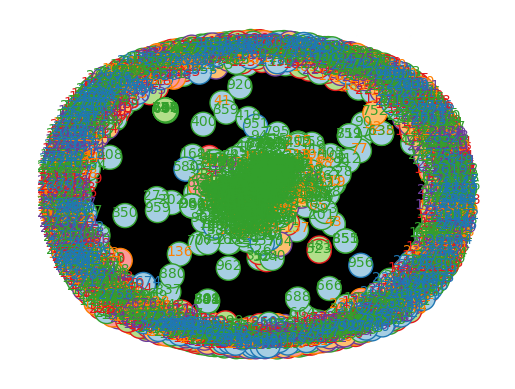

In [87]:
import matplotlib.colors as colors
def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G)
    # community ids
    print(G.nodes(data=True))
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    print(communities)
    numCommunities = max(communities) + 1
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # edges
    nx.draw_networkx_edges(G, pos)

    # nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        cmap = cmapLight
    )
    # set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Print node labels separately instead
    print(len(communities))
    print(len(communities))
    for n in G.nodes():
        # print(n)
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 2],
            color = cmapDark(communities[n-1])
        )

    plt.axis('off')
    # plt.savefig("karate.png")
    plt.show()
      
drawNetwork(G1)     

In [ ]:
# fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# # Create a gridspec for adding subplots of different sizes
# axgrid = fig.add_gridspec(5, 4)

# # ax0 = fig.add_subplot(axgrid[0:3, :])
# # Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# # pos = nx.spring_layout(Gcc, seed=10396953)
# # nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# # nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# # ax0.set_title("Connected components of G")
# # ax0.set_axis_off()

# ax1 = fig.add_subplot(axgrid[3:, :2])
# ax1.plot(degree_sequence, "b-", marker="o")
# ax1.set_title("Degree Rank Plot")
# ax1.set_ylabel("Degree")
# ax1.set_xscale('log')
# # ax1.set_yscale('log')
# ax1.set_xlabel("Rank")

# ax2 = fig.add_subplot(axgrid[3:, 2:])
# ax2.bar(*np.unique(degree_sequence, return_counts=True))
# ax2.set_title("Degree histogram")
# ax2.set_xlabel("Degree")
# # ax2.set_xscale('log')
# ax2.set_yscale('log')
# ax2.set_ylabel("# of Nodes")

# fig.tight_layout()
# plt.show()